<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
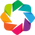

In [40]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import holoviews as hv
hv.extension('bokeh')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    market_data_scaled,
    columns=['price_change_percentage_24h',
             'price_change_percentage_7d',	
             'price_change_percentage_14d',	
             'price_change_percentage_30d',
             'price_change_percentage_60d',
             'price_change_percentage_200d',
             'price_change_percentage_1y']
)

In [7]:
# Copy the crypto names from the original data
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index('coin_id')

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [10]:
# Create an empty list to store the inertia values
inertia1 = []

# Create a for loop to compute the inertia with each possible value of k
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(df_market_data_scaled)
    inertia1.append(k_model.inertia_)

In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data1 = {"k": k, "inertia": inertia1}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow1 = pd.DataFrame(elbow_data1)

#Review the DataFrame
df_elbow1.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


In [12]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow1.hvplot.line(
    x="k",
    y="inertia",
    title= "Elbow Curve 1",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3 or 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [13]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=42)

In [14]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

KMeans(n_clusters=3, random_state=42)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(market_clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2
 1 1 1 1]


In [42]:
# Compute centers for predicted clusters
market_cluster_centers = model.cluster_centers_

In [43]:
# Create a copy of the DataFrame
df_market_scaled_predictions = df_market_data_scaled.copy()

In [44]:
# Add a new column to the DataFrame with the predicted clusters
df_market_scaled_predictions["MarketCluster"]= market_clusters

# Display sample data
df_market_scaled_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,MarketCluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [45]:
# Create a scatter plot using hvPlot by setting 
df_market_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="MarketCluster", # Color the graph points with the labels found using K-Means and 
    hover_cols= "coin_id" # identify the cryptocurrency represented by each data point.
)

:NdOverlay   [MarketCluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [46]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [47]:
# Use the PCA model with `fit_transform` to reduce to three principal components.
market_pca = pca.fit_transform(df_market_scaled_predictions)

# View the first five rows of the DataFrame. 
market_pca[:5]

array([[-0.64363513,  0.79763832,  0.47834419],
       [-0.47940588,  0.42007428,  0.9599407 ],
       [-0.42479368, -0.18628054, -0.64007654],
       [-0.46012195, -0.24395707, -0.47905126],
       [-1.26046168,  1.94250082,  1.89592642]])

In [48]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.36983407, 0.34853598, 0.17605778])

In [49]:
0.34871677+0.31363391+0.22627118

0.8886218600000001

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** About 89% of the total variance is explained by the three principal components.

In [50]:
# Create a new DataFrame with the PCA data.
df_market_pca = pd.DataFrame(market_pca, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
df_market_pca['coin_id'] = df_market_data.index

# Set the coinid column as index
df_market_pca = df_market_pca.set_index('coin_id')

# Display sample data
df_market_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.643635,0.797638,0.478344
ethereum,-0.479406,0.420074,0.959941
tether,-0.424794,-0.186281,-0.640077
ripple,-0.460122,-0.243957,-0.479051
bitcoin-cash,-1.260462,1.942501,1.895926


---

### Find the Best Value for k Using the PCA Data

In [51]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [52]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(df_market_pca)
    inertia2.append(k_model.inertia_)


In [53]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {"k": k, "inertia": inertia2}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow2 = pd.DataFrame(elbow_data2)

#Review the DataFrame
df_elbow2.head()

,k,inertia
0,1,258.489643
1,2,167.517428
2,3,93.456492
3,4,49.349182
4,5,37.577423


In [54]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow2.hvplot.line(
    x="k",
    y="inertia",
    title= "Elbow Curve 2",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [55]:
# Initialize the K-Means model using the best value for k
pca_kmeans = KMeans(n_clusters=4, random_state=42)

In [56]:
# Fit the K-Means model using the PCA data
pca_kmeans.fit(df_market_pca)

KMeans(n_clusters=4, random_state=42)

In [57]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = pca_kmeans.predict(df_market_pca)

# Print the resulting array of cluster values.
print(pca_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [58]:
# Compute centers for predicted clusters
predicted_cluster_centers = pca_kmeans.cluster_centers_

In [59]:
# Create a copy of the DataFrame with the PCA data
pca_predictions_df = df_market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_predictions_df["PredictedClusters"] = pca_clusters

# Display sample data
pca_predictions_df.head()

,PC1,PC2,PC3,PredictedClusters
coin_id,,,,
bitcoin,-0.643635,0.797638,0.478344,0
ethereum,-0.479406,0.420074,0.959941,0
tether,-0.424794,-0.186281,-0.640077,2
ripple,-0.460122,-0.243957,-0.479051,2
bitcoin-cash,-1.260462,1.942501,1.895926,0


In [60]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
pca_predictions_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by= "PredictedClusters",
    hover_cols= ["coin_id"] 
)

:NdOverlay   [PredictedClusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [74]:
import holoviews as hv

# Composite plot to contrast the Elbow curves
elbow_curve1 = df_elbow1.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve 1",
    label="Elbow Curve 1",
    color='blue',
    xticks=k
)

# Create the second elbow curve plot
elbow_curve2 = df_elbow2.hvplot.line(
    x="k",
    y="inertia",
    label="Elbow Curve 2",
    color='red',
    xticks=k
)

# Combine the two plots into one side-by-side composite plot
composite_plot = elbow_curve1 + elbow_curve2

# Display the composite plot
composite_plot.opts(title = "Elbow Curve Comparison")

:Layout
   .Curve.Elbow_Curve_1 :Curve   [k]   (inertia)
   .Curve.Elbow_Curve_2 :Curve   [k]   (inertia)

In [71]:
# Combine the two plots into one overlaid composite plot
composite_plot = elbow_curve1 * elbow_curve2

# Display the composite plot
composite_plot.opts(title = "Combined Elbow Curve Comparison")

:Overlay
   .Curve.Elbow_Curve_1 :Curve   [k]   (inertia)
   .Curve.Elbow_Curve_2 :Curve   [k]   (inertia)

In [72]:
# Define distinct color palettes for each plot
color_palette1 = hv.Cycle(['teal', 'blue', 'yellow'])
color_palette2 = hv.Cycle(['maroon', 'orange', 'violet'])

# Composite plot to contrast the clusters
scatterplot1 = df_market_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="MarketCluster",
    hover_cols= "coin_id",
    color=color_palette1
)

scatterplot2 = pca_predictions_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by= "PredictedClusters",
    hover_cols= ["coin_id"],
    color= color_palette2
)

composite_scatter = scatterplot1 * scatterplot2

# Display the composite scatterplot
composite_scatter.opts(title= "Scatter Plot Comparison")

:Overlay
   .NdOverlay.I  :NdOverlay   [MarketCluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [PredictedClusters]
      :Scatter   [PC1]   (PC2,coin_id)

In [73]:
import holoviews as hv

# Define a function to create circles around the centroids to make clusters easier to see and compare
def create_circle(x_center, y_center, radius=0.5, n_points=100):
    theta = np.linspace(0, 2*np.pi, n_points)
    x = x_center + radius * np.cos(theta)
    y = y_center + radius * np.sin(theta)
    return pd.DataFrame({'x': x, 'y': y})

# Create circles for market clusters
market_circles = hv.Overlay([
    hv.Polygons([create_circle(center[0], center[1]).values]).opts(color='green', alpha=0.3)
    for center in market_cluster_centers
])

# Create circles for predicted clusters
predicted_circles = hv.Overlay([
    hv.Polygons([create_circle(center[0], center[1]).values]).opts(color='violet', alpha=0.3)
    for center in predicted_cluster_centers
])

# Create the scatter plots
scatterplot1 = df_market_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="MarketCluster",
    hover_cols=["coin_id"],
    title= "KMeans Scatter Plot"
)

scatterplot2 = pca_predictions_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="PredictedClusters",
    hover_cols=["coin_id"],
    title = "PCA Scatter Plot"
)

# Combine scatter plots with circles
composite_scatter = (scatterplot1 * market_circles) + (scatterplot2 * predicted_circles)

# Display the composite scatterplot
composite_scatter.opts(title="Scatter Plot Comparison")

:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I  :NdOverlay   [MarketCluster]
         :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
      .Polygons.I   :Polygons   [x,y]
      .Polygons.II  :Polygons   [x,y]
      .Polygons.III :Polygons   [x,y]
   .Overlay.II :Overlay
      .NdOverlay.I  :NdOverlay   [PredictedClusters]
         :Scatter   [PC1]   (PC2,coin_id)
      .Polygons.I   :Polygons   [x,y]
      .Polygons.II  :Polygons   [x,y]
      .Polygons.III :Polygons   [x,y]
      .Polygons.IV  :Polygons   [x,y]

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The dimensionality of the data is reduced which can limit overfitting and make it easier to see the clusters. However, in this case the sample is small (41 rows of data) so the visual distinction between 3 and 4 clusters is not dramatic. In this particular case, using fewer clusters helps reduce the likelihood of having only one data point in a given cluster.